In [2]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import random


DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

IMG_SIZE = 50

In [3]:

# import pickle
# import numpy as np
# import matplotlib.pyplot as plt

# X = pickle.load(open("X.pickle","rb"))
# X = X/255.0
# y =  np.array(pickle.load(open("y.pickle","rb")))

# for i in X[:10]:
#     plt.figure()
#     plt.imshow(i,cmap=plt.cm.gray)
# print(model.predict(X[:10]))
# print(y[:10])
from PIL import Image
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt





def download(links):
    result = []
    for link in tqdm(links):
        result.append(Image.open(requests.get(link, stream = True).raw))
    return result


links = [
    'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fd.newsweek.com%2Fen%2Ffull%2F1759425%2Fsnowshoe-cat.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.breedyourdog.com%2Fuploads%2Flisting_images%2F31363%2F87883%2Fbig_1569F636-2C84-4356-AC8F-E18C17152D81.jpeg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2018%2F10%2F06%2F336068-puppy-dog-pitbull.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2017%2F11%2F23%2F514780-cat-cat_eyes-animals.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2017%2F11%2F23%2F498099-animals-feline-cat.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2018%2F10%2F07%2F766809-samoyed-dog-dogs-canine.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fassets3.thrillist.com%2Fv1%2Fimage%2F2711190%2F1200x600%2Fcrop%3B&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.businessinsider.in%2Fphoto%2F81878541%2F5-reasons-why-your-dog-is-constantly-scratching-themself.jpg%3Fimgsize%3D180883&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.panaynews.net%2Fwp-content%2Fuploads%2F2019%2F12%2FRabid-Dog.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.katyjon.com%2Fwp-content%2Fuploads%2F2014%2F10%2FTabby-macro.jpg&f=1&nofb=1'
    ,'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fcdn.chatsports.com%2Fthumbnails%2F2045-1118-original.jpeg&f=1&nofb=1'
]
images = download(links)




100%|██████████| 11/11 [00:03<00:00,  3.25it/s]


(1667, 2500, 3)


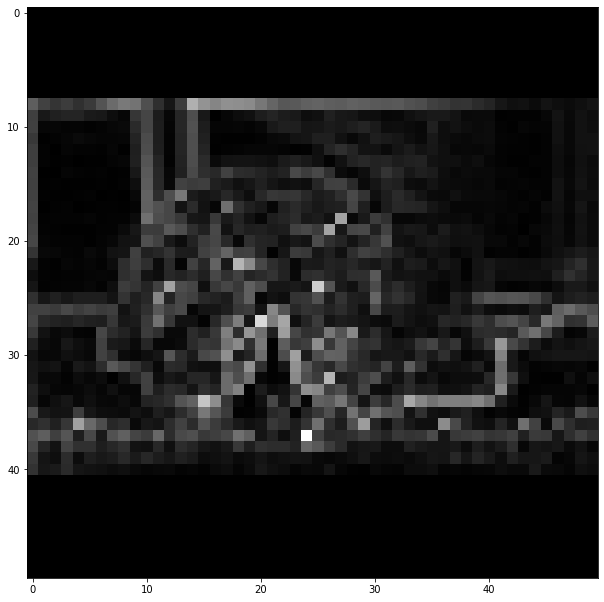

In [8]:


def split(img):
    def resize(img, size):
        # return cv2.resize(img,(50,50)), 50, 50
        if(img.shape[1]<img.shape[0]):
            w = int(img.shape[1]*size/img.shape[0])
            h = size
        else:
            w = size
            h = int(img.shape[0]*size/img.shape[1])
        return cv2.resize(img,(w,h)), w, h
        
    size = IMG_SIZE
    while size > 10:
        cur, w, h = resize(img, size)
        cur = cur.astype(np.float32)
        wp = int((50 - w) / 2)
        hp = int((50 - h) / 2)
        # cur = cv2.resize(img,(50,50) ,  interpolation=cv2.INTER_NEAREST)
        cur = cur.astype(np.float32)
        ximg = np.full((50, 50),1.0)
        max = 0
        for i in range(len(cur)):
            for j in range(len(cur[i])):
                xcur = 0
                for k in range(3):
                    xcur += abs(cur[i,j, k] - cur[i-1,j,k]) + abs(cur[i,j,k] - cur[i,j-1,k])
                ximg[hp+i,wp+j] = xcur
                if(xcur > max):
                    max = xcur
        ximg /= max
        np.nan_to_num(ximg, copy=False, nan=0.0, posinf=None, neginf=None)
        if(size == IMG_SIZE):
            result = ximg
        else:
            result = np.hstack((result,ximg))
        size /= 2
        size = int(size)
        break
    return result

# print(split(img).shape)
# cv2.imwrite('img.jpg', split(img))

# print(split(img))
img = np.array(images[0])
print(img.shape)
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
# fig.savefig('test2png.png', dpi=100)
plt.imshow(split(img),cmap='gray')
# a = cv2.Sobel(np.array(img),cv2.CV_64F,1,0,ksize = 1)
# b = cv2.Sobel(np.array(img),cv2.CV_64F,0,1,ksize = 1)

# plt.imshow(np.hstack((a,b)),cmap='gray')
# plt.imshow(cv2.Canny(np.array(img),10,20),cmap='gray')

In [9]:

training_data = []
 

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR, category)  # create path to dogs and cats
    class_num = [1 if category == i else 0 for i in CATEGORIES]  # get the classification  (0 or a 1). 0=dog 1=cat

    for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
        try:
            # img_array = cv2.imread(os.path.join(path, img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            # img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            img_array = split(cv2.imread(os.path.join(path, img)))  # convert to array
            training_data.append([img_array, class_num])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass

random.shuffle(training_data)
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


 85%|████████▌ | 10668/12501 [01:54<00:18, 96.61it/s]C:\Users\THIAGO\AppData\Local\Temp/ipykernel_19708/3547164807.py:30: RuntimeWarning: invalid value encountered in true_divide
  ximg /= max
100%|██████████| 12501/12501 [02:14<00:00, 92.85it/s]


[1, 0]

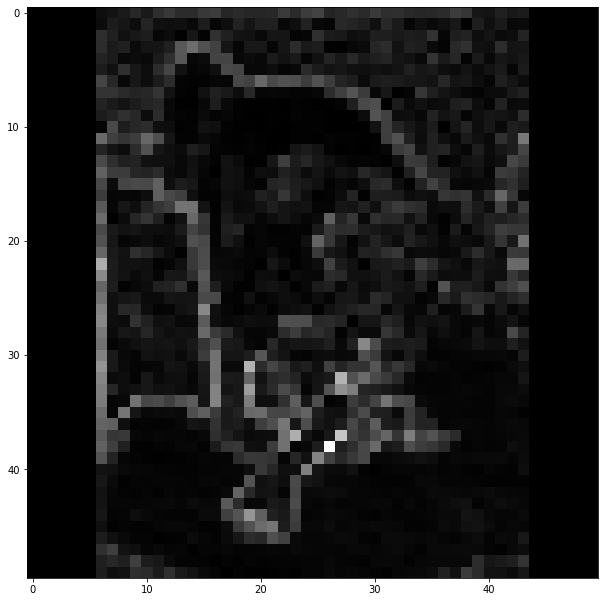

In [20]:
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
# fig.savefig('test2png.png', dpi=100)
i = 3
plt.imshow(X[i],cmap='gray')
y[i]


In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

import pickle

NAME = f'cats-vs-dogs-64x3-monochome{ int(time.time()) }'

tensorboard = TensorBoard(log_dir = f"logs/{NAME}")

pickle_in = open("X.pickle", "rb")
X = np.array(pickle.load(pickle_in))
pickle_in = open("y.pickle", "rb")
y =  np.array(pickle.load(pickle_in))

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())# this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))


model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.fit(
    X,
    y,
    batch_size = 32,
    validation_split = 0.3,
    epochs = 10,
    callbacks = [tensorboard]
)


Epoch 1/10
546/546 [==============================] - 13s 23ms/step - loss: 0.6264 - accuracy: 0.6475 - val_loss: 0.5715 - val_accuracy: 0.7213
Epoch 2/10
546/546 [==============================] - 12s 23ms/step - loss: 0.5474 - accuracy: 0.7317 - val_loss: 0.5446 - val_accuracy: 0.7270
Epoch 3/10
546/546 [==============================] - 12s 22ms/step - loss: 0.5073 - accuracy: 0.7544 - val_loss: 0.4986 - val_accuracy: 0.7628
Epoch 4/10
546/546 [==============================] - 12s 22ms/step - loss: 0.4760 - accuracy: 0.7735 - val_loss: 0.5323 - val_accuracy: 0.7337
Epoch 5/10
546/546 [==============================] - 12s 21ms/step - loss: 0.4421 - accuracy: 0.7942 - val_loss: 0.4821 - val_accuracy: 0.7750
Epoch 6/10
546/546 [==============================] - 12s 22ms/step - loss: 0.4076 - accuracy: 0.8160 - val_loss: 0.4750 - val_accuracy: 0.7779
Epoch 7/10
546/546 [==============================] - 12s 21ms/step - loss: 0.3821 - accuracy: 0.8261 - val_loss: 0.4745 - val_accuracy:

In [166]:
model.save('cats-vs-dogs-64x2-monochome.model')

INFO:tensorflow:Assets written to: cats-vs-dogs-64x2-split.model\assets


In [171]:
import tensorflow as tf
model = tf.keras.models.load_model('cats-vs-dogs-64x2-color.model')

[[4.7667500e-01 5.2332497e-01]
 [6.9591200e-01 3.0408797e-01]
 [9.6827549e-01 3.1724490e-02]
 [2.2264445e-01 7.7735549e-01]
 [1.3958532e-02 9.8604149e-01]
 [7.6235639e-04 9.9923766e-01]
 [8.8783193e-01 1.1216810e-01]
 [9.3946236e-01 6.0537666e-02]
 [4.1870502e-01 5.8129495e-01]
 [1.8985709e-02 9.8101431e-01]
 [1.7484264e-01 8.2515734e-01]]


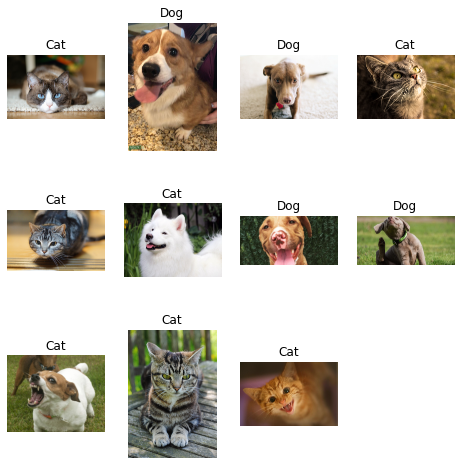

In [14]:
def process(images):
    processed = []
    for image in images:
        processed.append(split(np.array(image)))
    prediction = model.predict([np.array(processed)])
    result = []
    print(prediction)
    for i in prediction:
        result.append(CATEGORIES[int(1 if i[1] > i[0] else 0)])
    return result
fig = plt.figure(figsize = (8, 8))
label = process(images)
for i in range(len(images)):
    ax = fig.add_subplot(3, 4, i+1)
    ax.set_title(label[i])
    plt.axis('off')
    plt.imshow(images[i])
